## Import Necessary Libraries

In [156]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

In [2]:
df = pd.read_csv(r"Downloads/Invistico_Airline - Invistico_Airline.csv")

## Overview of Data

In [3]:
# Display dataset
display(df)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [10]:
# Column names of the DataFrame
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [11]:
# Categorical columns
categorical_columns = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

# Numerical columns
numerical_columns = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

## Visualization

### Target Distribution

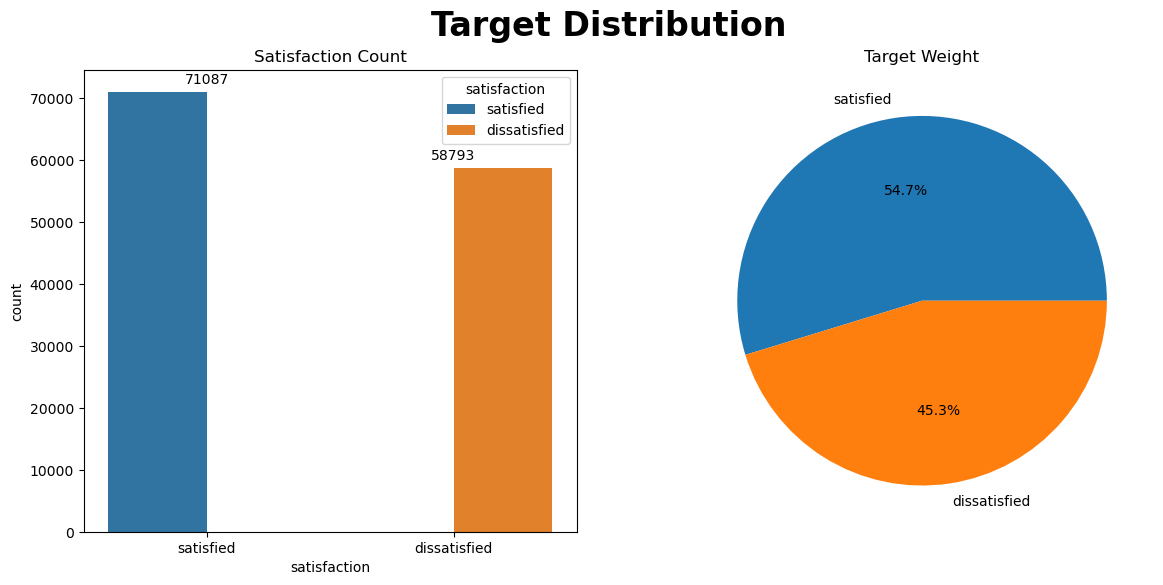

In [194]:
fig =  plt.figure(figsize=(14,6))
plt.suptitle('Target Distribution',weight='bold', fontsize=24)
grid=gridspec.GridSpec(nrows=1,ncols=2,figure=fig)

ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count')

sns.countplot(x='satisfaction',data=df,ax=ax1,hue='satisfaction')

for index,value in enumerate(df['satisfaction'].value_counts()):
    ax1.annotate(value,xy=(index,value+2000),ha='center',va='center')

ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')
label=list(df['satisfaction'].value_counts().index)
value=list(df['satisfaction'].value_counts().values)
ax2.pie(value,labels=label,autopct='%1.1f%%')

plt.show()

### Customer Profile

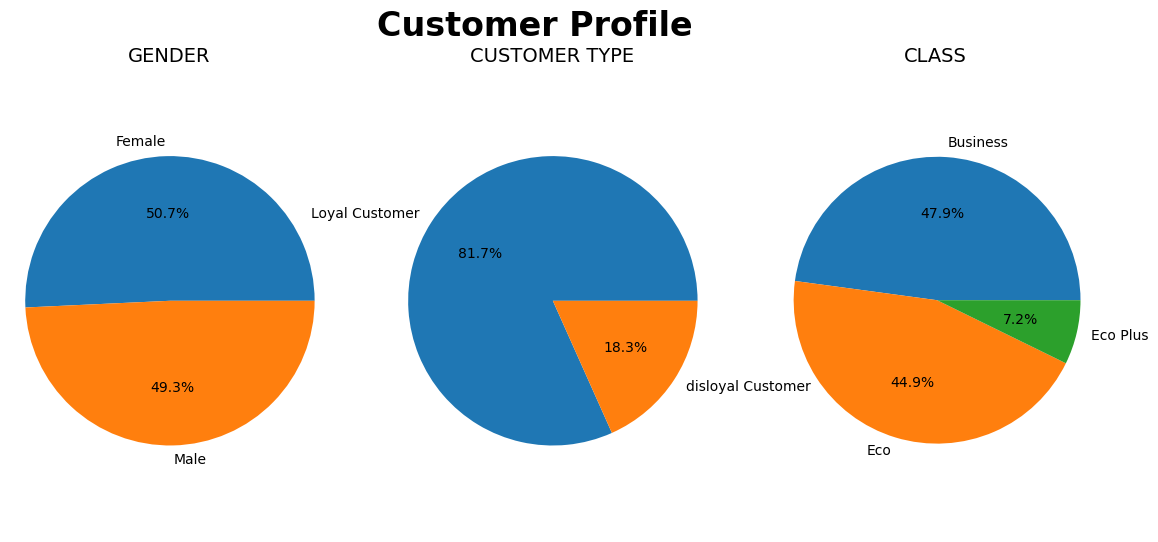

In [195]:
fig =  plt.figure(figsize=(14,6))
plt.suptitle('Customer Profile',weight='bold', fontsize=24)
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)

ax1=fig.add_subplot(131)
ax1.set_title('GENDER', fontsize=14)

label=list(df['Gender'].value_counts().index)
value=list(df['Gender'].value_counts().values)
ax1.pie(value,labels=label,autopct='%1.1f%%')
ax1.axis('equal')


ax2=fig.add_subplot(132)
ax2.set_title('CUSTOMER TYPE', fontsize=14)

label=list(df['Customer Type'].value_counts().index)
value=list(df['Customer Type'].value_counts().values)
ax2.pie(value,labels=label,autopct='%1.1f%%')
ax2.axis('equal')

ax3=fig.add_subplot(133)
ax3.set_title('CLASS', fontsize=14)

label=list(df['Class'].value_counts().index)
value=list(df['Class'].value_counts().values)
ax3.pie(value,labels=label,autopct='%1.1f%%')
ax3.axis('equal')

plt.show()

### Age Distribution

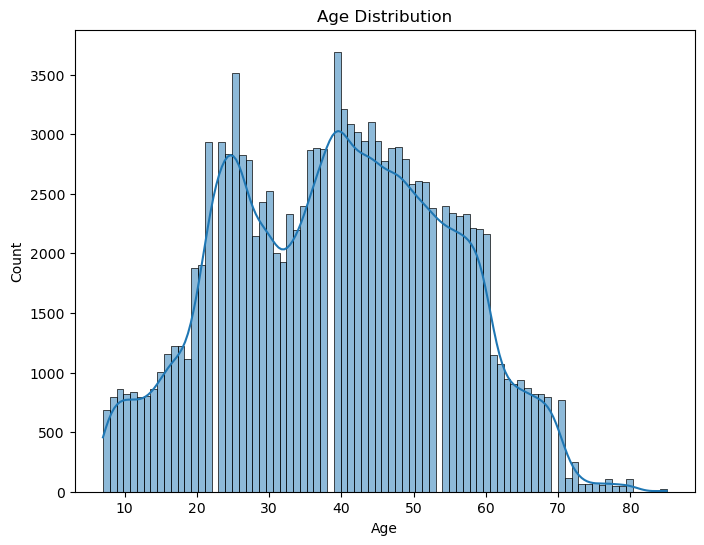

In [191]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')

plt.show()

### Customer Satisfaction Across Different Categories 

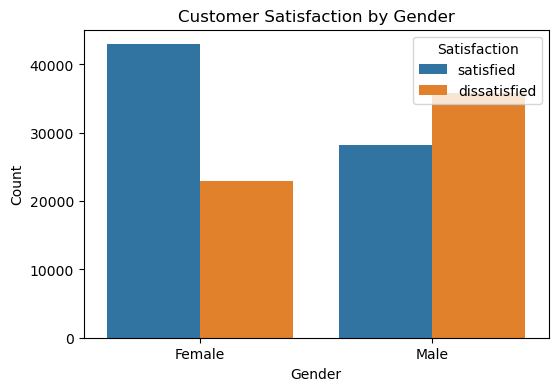

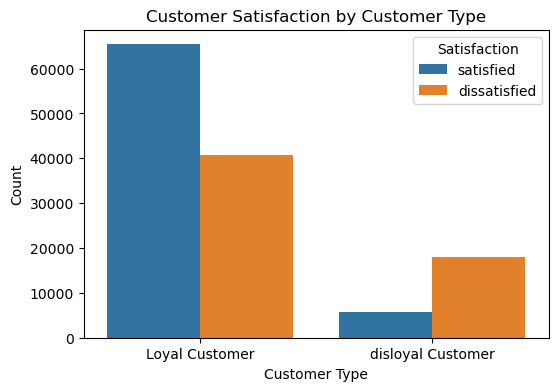

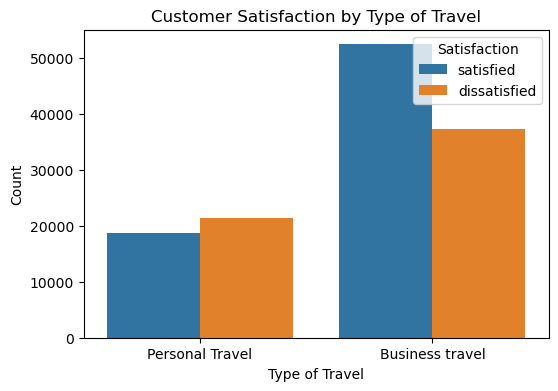

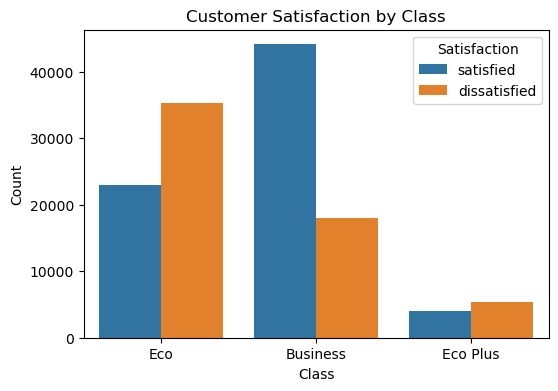

In [197]:
# Compare customer satisfaction across different categories
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
   
    sns.countplot(data=df, x=col, hue='satisfaction')
    
    plt.title('Customer Satisfaction by {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.legend(title='Satisfaction', loc='upper right')
    
    plt.show()

## Exploratory Data Analysis

In [84]:
# Descriptive statistics for the numerical columns
numerical_stats = df[numerical_columns].describe()

numerical_stats

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,14.713713,15.045465
std,15.119360,1027.115606,38.071126,38.416353
min,7.000000,50.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000
50%,40.000000,1925.000000,0.000000,0.000000
75%,51.000000,2544.000000,12.000000,13.000000
max,85.000000,6951.000000,1592.000000,1584.000000


In [85]:
# Descriptive statistics for the categorical columns
# Convert categorical columns to 'object' data type and calculate descriptive statistics
categorical_stats = df[categorical_columns].astype('object').describe()

categorical_stats

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,satisfied,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,71087,65899,106100,89693,62160,29183,29593,28150,33546,31560,41879,41510,39920,40675,39698,48240,36481,48795,35181


## Dealing with NaN values

In [8]:
# Calculate the number of missing values in each column
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values

Arrival Delay in Minutes             393
Inflight entertainment                 0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Gender                                 0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Inflight wifi service                  0
dtype: int64

In [9]:
# Display the columns with missing values
columns_with_missing_values = missing_values.loc[lambda x: x > 0]
columns_with_missing_values

Arrival Delay in Minutes    393
dtype: int64

In [15]:
df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(), inplace=True)
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

## Outlier Detection

Numerical columns - Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes may contain Outliers

In [30]:
def OutlierDetection(data,col):
    # IQR
    iqr = np.percentile(data[col],75)-np.percentile(data[col],25)
    lower_bound = np.percentile(data[col],25)-(1.5*iqr)
    upper_bound = np.percentile(data[col],75)+(1.5*iqr)
    
    # figure- Box plot
    
    sns.boxplot(y=col,data=data,flierprops={"marker":"x"}) 
    plt.title('Box-Plot', fontsize=15)
    plt.ylabel(col,fontsize=10)
    plt.show()
    

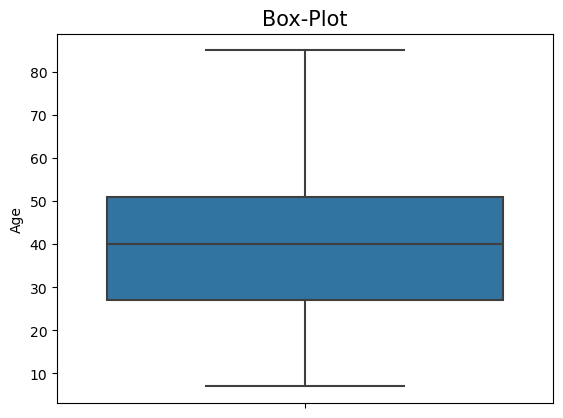

In [31]:
OutlierDetection(df,'Age')

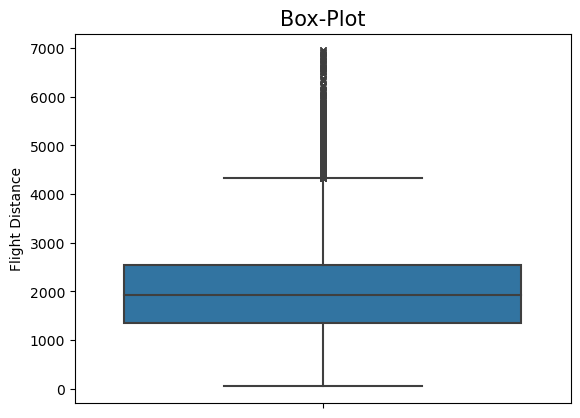

In [32]:
OutlierDetection(df,'Flight Distance')

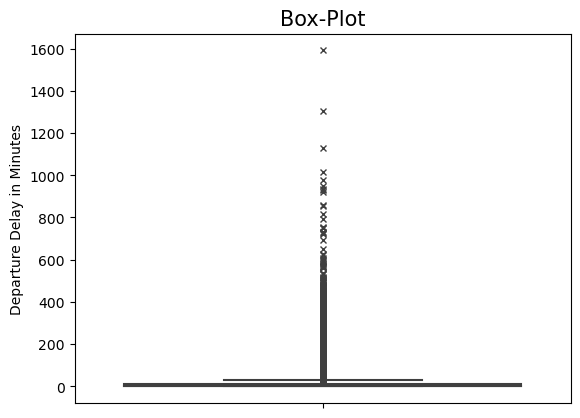

In [33]:
OutlierDetection(df,'Departure Delay in Minutes')

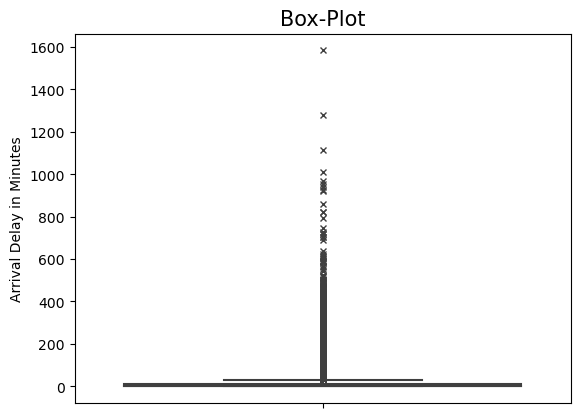

In [34]:
OutlierDetection(df,'Arrival Delay in Minutes')

## Outliers Removal 

In [40]:
def percentile_at_first_view(data,col,start,end,jump):
    for i in range(start,end,jump):
        var=data[col].values
        var=np.sort(var,axis=None)
        print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
    print("100 percentile value is ", var[-1])

In [41]:
def percentile_at_second_view(data,col,start,end,jump):
    for i in range(start,end,jump):
        var=data[col].values
        var=np.sort(var,axis=None)
        print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
    print("100 percentile value is ", var[-1])

In [49]:
def percentile_at_third_view(data,col):
    for i in np.arange(0.0,1.0,0.1):
        var=data[col].values
        var=np.sort(var,axis=None)
        print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is ", var[-1])

#### Flight Distance

In [43]:
percentile_at_first_view(df,'Flight Distance',0,100,10)

0 percentile value is 50
10 percentile value is 545
20 percentile value is 1136
30 percentile value is 1509
40 percentile value is 1725
50 percentile value is 1925
60 percentile value is 2134
70 percentile value is 2389
80 percentile value is 2739
90 percentile value is 3399
100 percentile value is  6951


In [47]:
percentile_at_second_view(df,'Flight Distance',90,100,1)

90 percentile value is 3399
91 percentile value is 3480
92 percentile value is 3566
93 percentile value is 3653
94 percentile value is 3741
95 percentile value is 3831
96 percentile value is 3924
97 percentile value is 4022
98 percentile value is 4316
99 percentile value is 4820
100 percentile value is  6951


In [50]:
percentile_at_third_view(df,'Flight Distance')

99.0 percentile value is 4820
99.1 percentile value is 4878
99.2 percentile value is 4946
99.3 percentile value is 5020
99.4 percentile value is 5088
99.5 percentile value is 5154
99.6 percentile value is 5243
99.7 percentile value is 5343
99.8 percentile value is 5486
99.9 percentile value is 5693
100 percentile value is  6951


<function matplotlib.pyplot.show(close=None, block=None)>

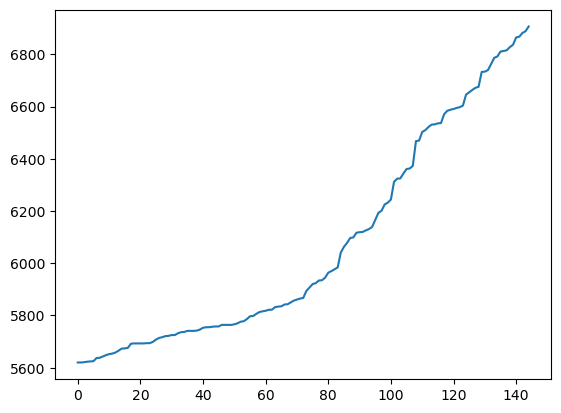

In [74]:
var=df['Flight Distance'].values
var=np.sort(var,axis=None)
plt.plot(var[-150:-5])
plt.show

In [60]:
df[df['Flight Distance']>5693]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
540,satisfied,Female,Loyal Customer,13,Personal Travel,Eco,6792,0,5,0,...,1,3,4,5,5,1,3,1,3,0.0
588,satisfied,Female,Loyal Customer,63,Personal Travel,Business,6591,0,5,0,...,1,3,2,4,3,1,5,1,3,0.0
1160,dissatisfied,Male,Loyal Customer,35,Personal Travel,Eco,6470,1,1,1,...,3,1,2,2,2,3,2,3,0,32.0
2859,dissatisfied,Female,Loyal Customer,47,Personal Travel,Eco,6811,1,3,1,...,3,3,3,3,5,3,2,3,0,0.0
5885,dissatisfied,Female,Loyal Customer,45,Personal Travel,Eco,6097,1,5,1,...,3,1,2,3,3,3,2,3,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122235,satisfied,Male,Loyal Customer,30,Business travel,Business,5722,1,1,1,...,5,5,4,4,4,4,5,5,0,0.0
126755,satisfied,Female,Loyal Customer,24,Business travel,Business,5736,3,3,2,...,5,3,5,3,2,5,3,5,140,144.0
126795,satisfied,Female,Loyal Customer,41,Business travel,Business,5842,4,4,4,...,5,3,3,5,5,5,5,5,222,243.0
127938,satisfied,Female,Loyal Customer,56,Business travel,Business,6468,3,3,5,...,5,3,3,5,4,5,3,5,0,0.0


#### Departure Delay in Minutes

In [61]:
percentile_at_first_view(df,'Departure Delay in Minutes',0,100,10)

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 2
70 percentile value is 8
80 percentile value is 19
90 percentile value is 44
100 percentile value is  1592


In [63]:
percentile_at_second_view(df,'Departure Delay in Minutes',90,100,1)

90 percentile value is 44
91 percentile value is 48
92 percentile value is 54
93 percentile value is 60
94 percentile value is 68
95 percentile value is 77
96 percentile value is 89
97 percentile value is 107
98 percentile value is 132
99 percentile value is 180
100 percentile value is  1592


In [64]:
percentile_at_third_view(df,'Departure Delay in Minutes')

99.0 percentile value is 180
99.1 percentile value is 186
99.2 percentile value is 194
99.3 percentile value is 203
99.4 percentile value is 214
99.5 percentile value is 232
99.6 percentile value is 250
99.7 percentile value is 277
99.8 percentile value is 315
99.9 percentile value is 381
100 percentile value is  1592


<function matplotlib.pyplot.show(close=None, block=None)>

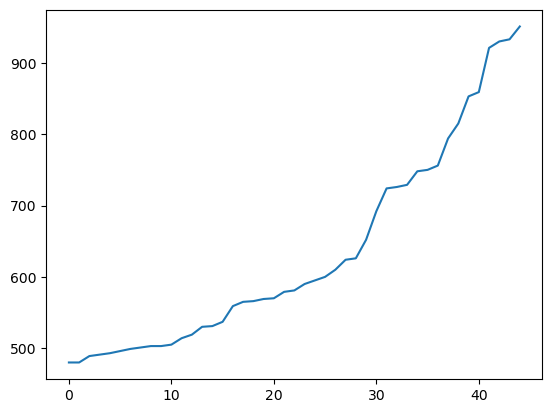

In [66]:
var=df['Departure Delay in Minutes'].values
var=np.sort(var,axis=None)
plt.plot(var[-50:-5])
plt.show

In [76]:
df[df['Departure Delay in Minutes']>620]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
3539,dissatisfied,Female,Loyal Customer,45,Personal Travel,Eco,2460,1,4,1,...,5,3,4,4,5,5,5,5,794,795.0
3758,dissatisfied,Male,Loyal Customer,30,Personal Travel,Eco,3468,1,4,1,...,1,5,3,4,4,1,4,1,978,970.0
4778,dissatisfied,Male,Loyal Customer,48,Personal Travel,Eco,4318,1,4,1,...,1,3,3,2,2,1,2,1,626,604.0
5741,dissatisfied,Female,Loyal Customer,7,Personal Travel,Eco,1990,1,5,0,...,4,4,4,5,1,4,2,4,724,705.0
5801,dissatisfied,Male,Loyal Customer,33,Personal Travel,Eco,2832,1,5,0,...,1,4,2,5,5,1,4,1,726,691.0
9704,dissatisfied,Female,Loyal Customer,47,Personal Travel,Eco,3113,2,2,2,...,2,2,4,4,4,2,3,2,1592,1584.0
10883,dissatisfied,Female,Loyal Customer,42,Personal Travel,Business,2256,2,3,2,...,3,1,3,3,2,3,3,3,692,702.0
17110,dissatisfied,Male,Loyal Customer,8,Personal Travel,Eco,3017,2,5,2,...,1,4,4,3,5,1,3,1,1128,1115.0
52728,dissatisfied,Male,disloyal Customer,43,Business travel,Business,2478,3,3,3,...,5,5,4,5,5,5,3,5,921,924.0
54202,dissatisfied,Female,disloyal Customer,39,Business travel,Eco,2431,3,3,3,...,4,5,3,1,5,4,1,4,652,638.0


#### Arrival Delay in Minutes

In [69]:
percentile_at_first_view(df,'Arrival Delay in Minutes',0,100,10)

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 2.0
70 percentile value is 8.0
80 percentile value is 19.0
90 percentile value is 44.0
100 percentile value is  1584.0


In [71]:
percentile_at_second_view(df,'Arrival Delay in Minutes',90,100,1)

90 percentile value is 44.0
91 percentile value is 49.0
92 percentile value is 54.0
93 percentile value is 60.0
94 percentile value is 68.0
95 percentile value is 78.0
96 percentile value is 91.0
97 percentile value is 108.0
98 percentile value is 134.0
99 percentile value is 182.0
100 percentile value is  1584.0


In [72]:
percentile_at_third_view(df,'Arrival Delay in Minutes')

99.0 percentile value is 182.0
99.1 percentile value is 187.0
99.2 percentile value is 196.0
99.3 percentile value is 207.0
99.4 percentile value is 219.0
99.5 percentile value is 236.0
99.6 percentile value is 255.0
99.7 percentile value is 280.0
99.8 percentile value is 317.0
99.9 percentile value is 383.0
100 percentile value is  1584.0


<function matplotlib.pyplot.show(close=None, block=None)>

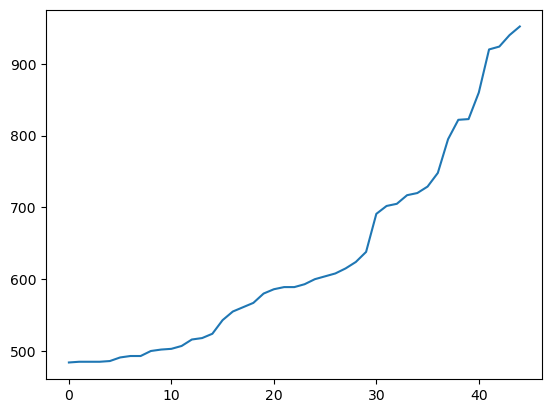

In [75]:
var=df['Arrival Delay in Minutes'].values
var=np.sort(var,axis=None)
plt.plot(var[-50:-5])
plt.show

In [77]:
df[df['Arrival Delay in Minutes']>510]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
3539,dissatisfied,Female,Loyal Customer,45,Personal Travel,Eco,2460,1,4,1,...,5,3,4,4,5,5,5,5,794,795.0
3758,dissatisfied,Male,Loyal Customer,30,Personal Travel,Eco,3468,1,4,1,...,1,5,3,4,4,1,4,1,978,970.0
4778,dissatisfied,Male,Loyal Customer,48,Personal Travel,Eco,4318,1,4,1,...,1,3,3,2,2,1,2,1,626,604.0
5741,dissatisfied,Female,Loyal Customer,7,Personal Travel,Eco,1990,1,5,0,...,4,4,4,5,1,4,2,4,724,705.0
5801,dissatisfied,Male,Loyal Customer,33,Personal Travel,Eco,2832,1,5,0,...,1,4,2,5,5,1,4,1,726,691.0
7862,dissatisfied,Male,Loyal Customer,14,Personal Travel,Eco,2103,1,5,2,...,2,4,4,5,4,2,4,2,519,516.0
9704,dissatisfied,Female,Loyal Customer,47,Personal Travel,Eco,3113,2,2,2,...,2,2,4,4,4,2,3,2,1592,1584.0
10883,dissatisfied,Female,Loyal Customer,42,Personal Travel,Business,2256,2,3,2,...,3,1,3,3,2,3,3,3,692,702.0
16274,dissatisfied,Male,Loyal Customer,50,Personal Travel,Eco,3106,2,5,1,...,5,3,4,5,4,5,3,5,579,561.0
17110,dissatisfied,Male,Loyal Customer,8,Personal Travel,Eco,3017,2,5,2,...,1,4,4,3,5,1,3,1,1128,1115.0


In [82]:
def removal_outlier(data):
    a=data.shape[0]
    print("{} are the number of rows we have in our original dataframe".format(a))
    new_dataframe=data[(data['Flight Distance']<5693) & (data['Departure Delay in Minutes']<620) & (data['Arrival Delay in Minutes']<510)]
    b=new_dataframe.shape[0]
                        
    print("Number of Outliers:",(a-b))
    print("Percentage of data removed:",100-(b/a)*100)
    return new_dataframe

new_df = removal_outlier(df)                       

129880 are the number of rows we have in our original dataframe
Number of Outliers: 169
Percentage of data removed: 0.13012011087157305


In [81]:
new_df = removal_outlier(df) 

129880 are the number of rows we have in our original dataframe
Number of Outliers: 169
Percentage of data removed: 0.13012011087157305


In [83]:
display(new_df)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## Label Encoding

In [86]:
label ={}
for col in new_df.select_dtypes(include=['object']).columns:
    label[col]=LabelEncoder()
    new_df[col]=label[col].fit_transform(new_df[col])

C:\Users\raksh\AppData\Local\Temp\ipykernel_17340\2472052088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col]=label[col].fit_transform(new_df[col])


In [88]:
display(new_df)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,1,63,1,0,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,1,69,1,1,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,1,66,1,1,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## Correlation Analysis

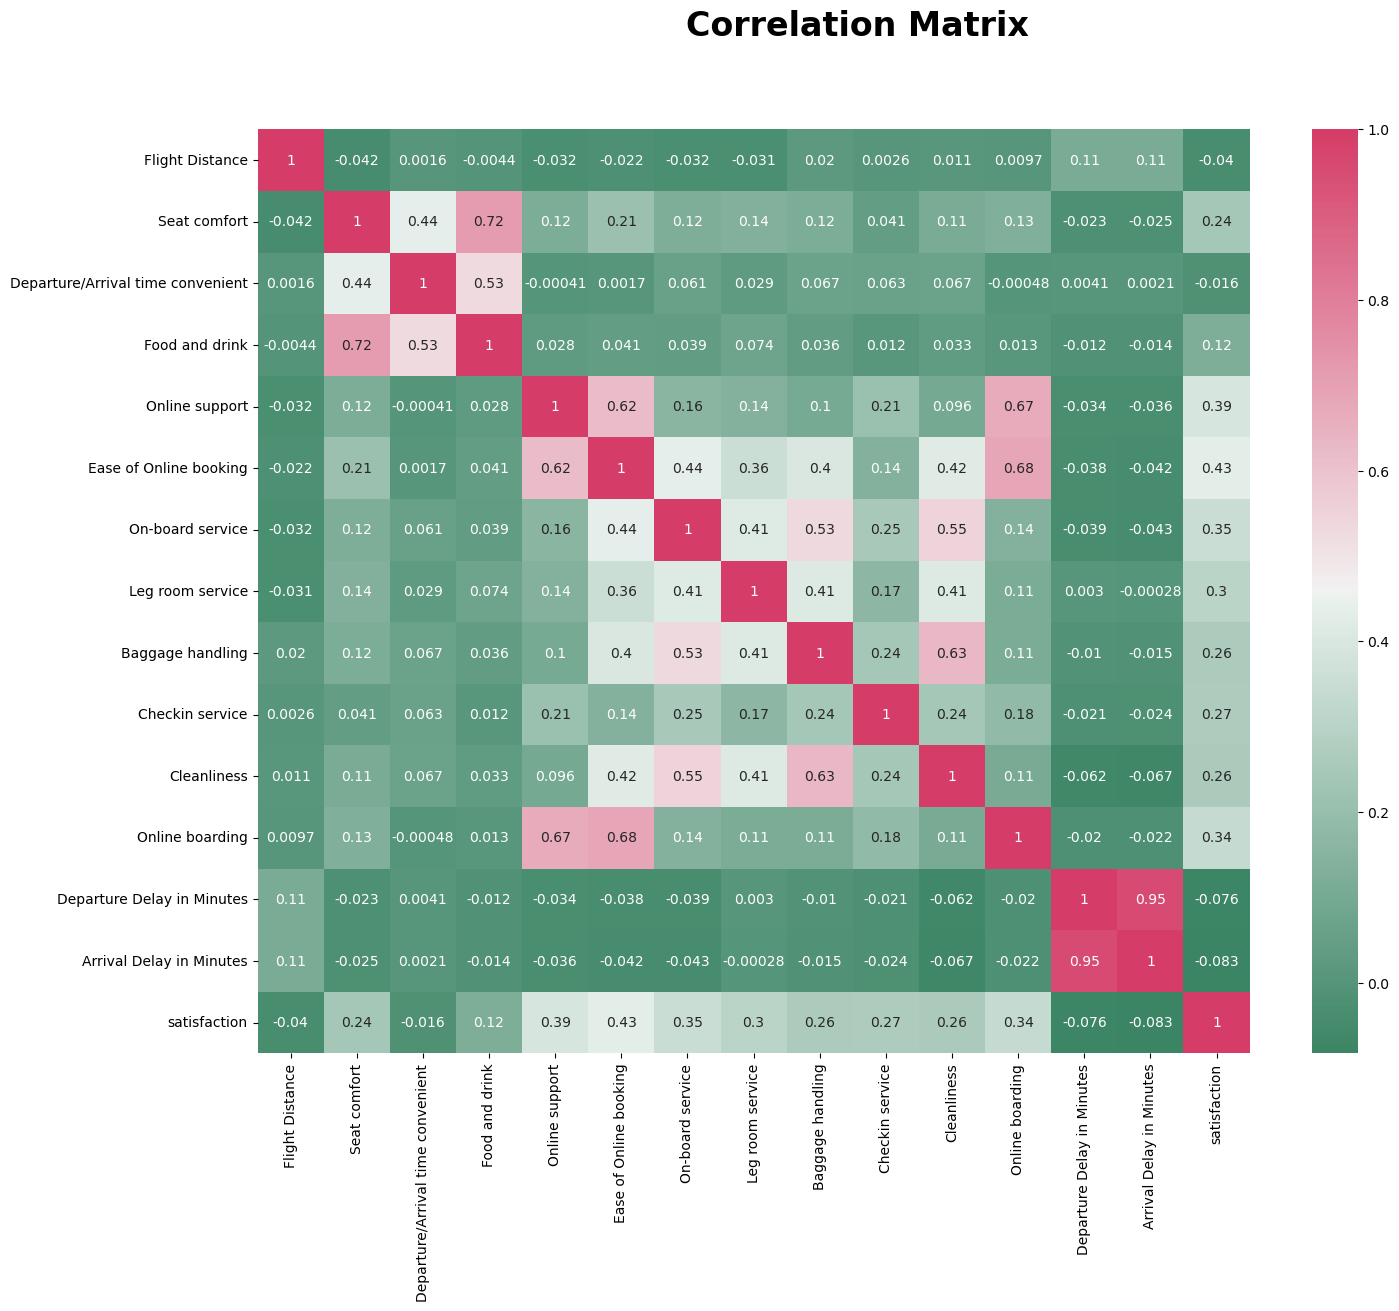

In [99]:
fig = plt.subplots(figsize=(16,12))
plt.suptitle('Correlation Matrix',fontsize=24,weight='bold')
cmap=sns.diverging_palette(150,1,as_cmap=True)
sns.heatmap(new_df[['Flight Distance','Seat comfort','Departure/Arrival time convenient','Food and drink','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction']].corr(),annot=True,cmap=cmap)

plt.show()

## Splitting Data into Features and Target Variable

In [100]:
# Split the dataframe into features (X) and target variable (y)
X = new_df.drop('satisfaction', axis=1)
y = new_df.satisfaction

## Splitting Data into Training and Testing Sets

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.30, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - X shape:", X_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (90797, 22)
Testing set - X shape: (38914, 22)
Training set - y shape: (90797,)
Testing set - y shape: (38914,)


## Normalize Features

In [105]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

## Model Selection and Cross-Validation

In [145]:
# Define a list of models to evaluate
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LinearSVC(),
    LGBMClassifier(),
    SVC(),
    Perceptron(),
    AdaBoostClassifier(),
    KNeighborsClassifier()
    
    
]

# Define the number of splits for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model and perform cross-validation
for model in models:
    # Perform cross-validation and compute accuracy scores
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # Print the mean accuracy score for the current model
    print(f"{model.__class__.__name__}: Accuracy = {scores.mean()}")

LogisticRegression: Accuracy = 0.8357435045740113
DecisionTreeClassifier: Accuracy = 0.9372226554568274
RandomForestClassifier: Accuracy = 0.956077893560383
XGBClassifier: Accuracy = 0.956276109612277
LinearSVC: Accuracy = 0.8361399870163047
LGBMClassifier: Accuracy = 0.9548663791670882
SVC: Accuracy = 0.945086321439133
Perceptron: Accuracy = 0.7470399382061492
AdaBoostClassifier: Accuracy = 0.8985649571710294
KNeighborsClassifier: Accuracy = 0.9220899795322426


In [138]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier()
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [13:44<00:00, 28.43s/it] 


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.96,0.96,0.96,0.96,1.43
ExtraTreesClassifier,0.96,0.96,0.96,0.96,5.87
RandomForestClassifier,0.96,0.96,0.96,0.96,7.76
LGBMClassifier,0.96,0.96,0.96,0.96,0.39
BaggingClassifier,0.95,0.95,0.95,0.95,3.17
SVC,0.95,0.95,0.95,0.95,157.52
DecisionTreeClassifier,0.94,0.94,0.94,0.94,0.55
KNeighborsClassifier,0.92,0.92,0.92,0.92,53.38
ExtraTreeClassifier,0.91,0.91,0.91,0.91,0.14


## Model Training and Prediction

In [139]:
# Create an instance of RandomForestClassifier
model = XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Get the predicted probabilities for class 1 (satisfaction = 'satisfied')
y_prob = model.predict_proba(X_test)[:, 1]

## Model Evaluation

#### Confusion Matrix

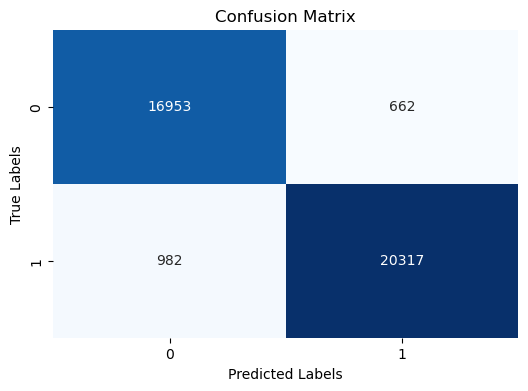

In [144]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [141]:
# Generate classification report
class_report = classification_report(y_test, y_pred)

# Split the classification report into rows
rows = class_report.split('\n')[1:]

# Split each row into columns and remove unnecessary whitespace
table = [[i.strip() for i in row.split('      ')] for row in rows]

# Remove the unnecessary value
del table[4][1]

# Set the headers for the table
header = ['', 'precision', 'recall', 'f1-score', 'support']

# Format the classification report as a table using the tabulate library
report_table = tabulate(table, headers=header, tablefmt='github')

# Print the classification report table
print(report_table)

|              | precision   | recall   | f1-score       | support        |
|--------------|-------------|----------|----------------|----------------|
|              |             |          |                |                |
|              | 0           | 0.95     | 0.96           | 0.95     17615 |
|              | 1           | 0.97     | 0.95           | 0.96     21299 |
|              |             |          |                |                |
| accuracy     |             |          | 0.96     38914 |                |
| macro avg    | 0.96        | 0.96     | 0.96     38914 |                |
| weighted avg | 0.96        | 0.96     | 0.96     38914 |                |
|              |             |          |                |                |


#### Feature Importance

In [149]:
# Check if the trained model has attribute 'feature_importances_'
if hasattr(model, 'feature_importances_'):
    # Retrieve feature importance values
    feature_importance = model.feature_importances_
    # Sort feature importance indices
    sorted_idx = np.argsort(feature_importance)
    # Retrieve feature names
    features = X.columns
    # Plot feature importance
    plt.figure()
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), features[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance')
    plt.show()

#### ROC Curve

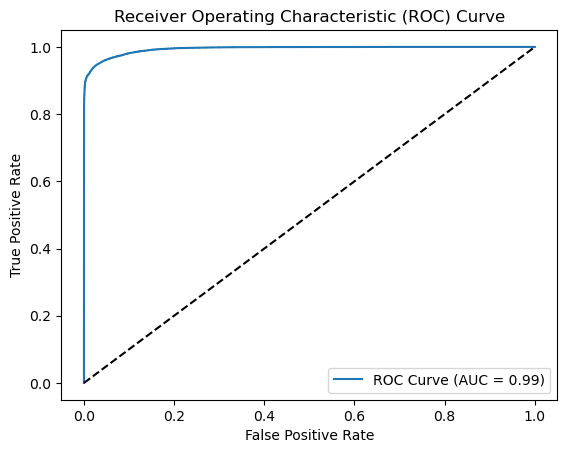

In [148]:
# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y_test)

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_encoded, y_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
